In [2]:


    # JUPYTER
    # FAQ

# Software Versions used

''' Jupyter - 6.3.0 
    Pandas -  1.2.4
    Numpy  -  1.20.1
    Python -  3.8.8
    Scipy  -  1.6.2
    Windows - 10
    
'''

' Jupyter - 6.3.0 \nPandas -  1.2.4\nNumpy  -  1.20.1\nPython -  3.8.8\nScipy  -  1.6.2\nWindows - 10\n\n'

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


import statsmodels.formula.api as smf

In [4]:


redwine_df = pd.read_csv("/Users/praburam.krishnamurthy/GL/Supervised Learning/winequality_red.csv")
redwine_df.shape

(1599, 12)

In [5]:
redwine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:


# Take mean for all the attributes

sample_means = redwine_df.mean()
sample_standard_deviations = redwine_df.std()

d = {'Sample_mean': sample_means, 'Sample_standard_deviation': sample_standard_deviations}
sample_statistics = pd.DataFrame(data=d)

In [7]:


sample_statistics

,Sample_mean,Sample_standard_deviation
fixed acidity,8.319637,1.741096
volatile acidity,0.527821,0.179060
citric acid,0.270976,0.194801
residual sugar,2.538806,1.409928
chlorides,0.087467,0.047065
free sulfur dioxide,15.874922,10.460157
total sulfur dioxide,46.467792,32.895324
density,0.996747,0.001887
pH,3.311113,0.154386
sulphates,0.658149,0.169507


In [8]:


# Assuming wine dataset is a larger population from which the sample redwine data is taken.

wine_df = pd.read_csv("/Users/praburam.krishnamurthy/GL/Supervised Learning/wine.csv")


wine_df.shape



(1630, 12)

In [9]:


pop_means = wine_df.mean()
pop_standard_deviations = wine_df.std()

d = {'Population_mean': pop_means, 'Population_Standard_Deviation': pop_standard_deviations}
pop_parameters = pd.DataFrame(data=d)

In [10]:


pop_parameters


,Population_mean,Population_Standard_Deviation
fixed acidity,8.292945,1.736537
volatile acidity,0.528914,0.179048
citric acid,0.269706,0.194513
residual sugar,2.534693,1.402006
chlorides,0.087353,0.046968
free sulfur dioxide,16.004908,10.512349
total sulfur dioxide,46.560123,32.988000
density,0.996726,0.001882
pH,3.312227,0.153887
sulphates,0.657748,0.168650


In [11]:
redwine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:


redwine_df.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [13]:
redwine_df.isna().count() 

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

<Axes: >

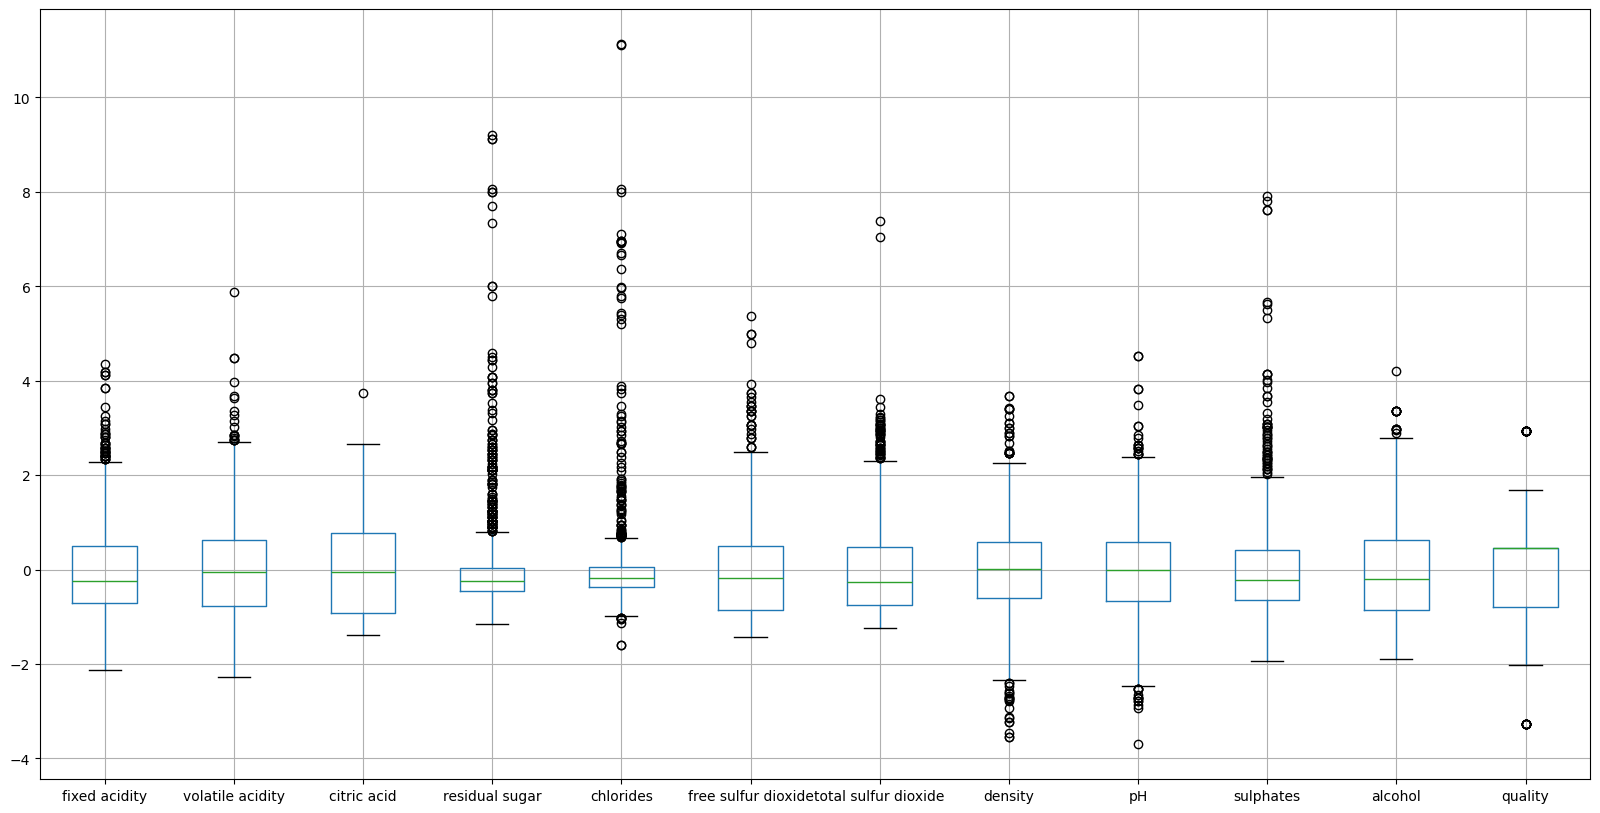

In [14]:


#redwine_df.boxplot()   # Lot of outliers

redwine_df.apply(zscore).boxplot(figsize=(20,10))

In [15]:
def norm_dev_Z_test(mu, std, col):
    Mu = mu
    Std = std

    # Cacluate standard error for ClT of the column
    
    print("Population Mean :" + str(Mu))
    print("Population Stddev :" + str(Std))


    sample_avg = np.average(col)
    std_error = Std / np.sqrt(np.size(col)) # Standard dev of the sampling mean distribution... estimated from population

    print("\nSample Avg " , sample_avg)
    print("Standard Error " , std_error)



    # Z_norm_deviate =  sample_mean - population_mean / std_error_bp

    Z_norm_deviate = (sample_avg - Mu) / std_error
    print("\nNormal Deviate Z value :" , Z_norm_deviate)


    # Calculate Pvalue for the calculated Z_norm_deviate 
    p_value = scipy.stats.norm.sf(abs(Z_norm_deviate))*2 #twosided using sf - Survival Function
    print('\np values' , p_value)

    if p_value > 0.05:
    	print('\nSamples are likely drawn from the same distributions (fail to reject H0)')
    else:
    	print('Samples are likely drawn from different distributions (reject H0)')

In [16]:


print("Normal Deviate Z Test")
for col in redwine_df.columns:
    print("\n" + col + " :")
    m, s = (pop_parameters.loc[col])
    norm_dev_Z_test(m, s, redwine_df[col])

Normal Deviate Z Test

fixed acidity :
Population Mean :8.292944785276074
Population Stddev :1.7365370705986487

Sample Avg  8.31963727329581
Standard Error  0.043426999823532944

Normal Deviate Z value : 0.6146519015405453


NameError: name 'scipy' is not defined

In [17]:


'''
1. When there are multiple columns, it is quite possible that on some columns we reject H0 and on others fail to reject H0
2. In this example, all the columns seem to represent the population data well
 '''

'\n1. When there are multiple columns, it is quite possible that on some columns we reject H0 and on others fail to reject H0\n2. In this example, all the columns seem to represent the population data well\n '

In [18]:
def one_sample_ttest(col ,mu ):
    statistics, p_value = st.ttest_1samp(col, mu)
    print("Pvalue :", p_value)
    if p_value > 0.05:
        print('\nSamples are likely drawn from the same distributions (fail to reject H0)')
    else:
        print('\nSamples are likely drawn from different distributions (reject H0)')

In [19]:


print("One Sample TTest")
for col in redwine_df.columns:
    print("\n" + col + " :")
    m, s = (pop_parameters.loc[col])
    one_sample_ttest(redwine_df[col], m)

One Sample TTest

fixed acidity :
Pvalue : 0.5399355615685903

Samples are likely drawn from the same distributions (fail to reject H0)

volatile acidity :
Pvalue : 0.8070906164337945

Samples are likely drawn from the same distributions (fail to reject H0)

citric acid :
Pvalue : 0.7943455957015071

Samples are likely drawn from the same distributions (fail to reject H0)

residual sugar :
Pvalue : 0.907168618039734

Samples are likely drawn from the same distributions (fail to reject H0)

chlorides :
Pvalue : 0.9230004371272731

Samples are likely drawn from the same distributions (fail to reject H0)

free sulfur dioxide :
Pvalue : 0.619316539124886

Samples are likely drawn from the same distributions (fail to reject H0)

total sulfur dioxide :
Pvalue : 0.910649918677547

Samples are likely drawn from the same distributions (fail to reject H0)

density :
Pvalue : 0.6542034824070513

Samples are likely drawn from the same distributions (fail to reject H0)

pH :
Pvalue : 0.773013813743

In [20]:


'''
Data seems to represent the population characteristics very wll. As is evident from both the statistical tests
'''

'\nData seems to represent the population characteristics very wll. As is evident from both the statistical tests\n'

In [21]:


'''Strategies to fix outliers

1. Replace with central values. Use median when too many outliers
2. Replace with first and third quartile instead of central values
3. Replace outliers with classwise central values
'''

'Strategies to fix outliers\n\n1. Replace with central values. Use median when too many outliers\n2. Replace with first and third quartile instead of central values\n3. Replace outliers with classwise central values\n'

In [22]:


def outlierfix(df):
    for col in df.columns:
        stddev = df[col].std()
        med = df[col].median()
        var = (df[col] - med).abs()
        df[col] = np.where(var > (2*stddev), med , df[col] )
    
    return(df)

In [23]:


print("Fixing outliers by replacing with median")

imputed_redwine_df = outlierfix(redwine_df)


Fixing outliers by replacing with median


In [24]:


# Visually check the impact of outlier fixing

imputed_redwine_df.apply(zscore).boxplot(figsize=(20,10))

<Axes: >

In [25]:


# Observations

'''
1. Compared to previous boxplot, many of the boxes now do not have the outliers
2. Some continue to have outliers which are secondary outliers and we can ignore them here
'''

'\n1. Compared to previous boxplot, many of the boxes now do not have the outliers\n2. Some continue to have outliers which are secondary outliers and we can ignore them here\n'

In [26]:
print("One Sample TTest after outlier fixing")
for col in redwine_df.columns:
    print("\n" + col + " :")
    m, s = (pop_parameters.loc[col])
    one_sample_ttest(imputed_redwine_df[col], m)

One Sample TTest after outlier fixing

fixed acidity :
Pvalue : 1.3712986193903114e-19

Samples are likely drawn from different distributions (reject H0)

volatile acidity :
Pvalue : 1.7376234134269772e-06

Samples are likely drawn from different distributions (reject H0)

citric acid :
Pvalue : 0.0016027750747420546

Samples are likely drawn from different distributions (reject H0)

residual sugar :
Pvalue : 3.5395651200667946e-64

Samples are likely drawn from different distributions (reject H0)

chlorides :
Pvalue : 6.786197153929402e-45

Samples are likely drawn from different distributions (reject H0)

free sulfur dioxide :
Pvalue : 1.796761319310861e-18

Samples are likely drawn from different distributions (reject H0)

total sulfur dioxide :
Pvalue : 1.1559908377320152e-28

Samples are likely drawn from different distributions (reject H0)

density :
Pvalue : 0.5001008619743417

Samples are likely drawn from the same distributions (fail to reject H0)

pH :
Pvalue : 0.340255751665

In [27]:
print("Two Sample TTest after outlier fixing")
for col in redwine_df.columns:
    print("\n" + col + " :")
    statistics, p_value = st.ttest_rel(imputed_redwine_df[col], redwine_df[col])   
    print(statistics, p_value)
    
    if p_value > 0.05:
    	print('\nSamples are likely drawn from the same distributions (fail to reject H0)')
    else:
    	print('Samples are likely drawn from different distributions (reject H0)')

Two Sample TTest after outlier fixing

fixed acidity :
nan nan
Samples are likely drawn from different distributions (reject H0)

volatile acidity :
nan nan
Samples are likely drawn from different distributions (reject H0)

citric acid :
nan nan
Samples are likely drawn from different distributions (reject H0)

residual sugar :
nan nan
Samples are likely drawn from different distributions (reject H0)

chlorides :
nan nan
Samples are likely drawn from different distributions (reject H0)

free sulfur dioxide :
nan nan
Samples are likely drawn from different distributions (reject H0)

total sulfur dioxide :
nan nan
Samples are likely drawn from different distributions (reject H0)

density :
nan nan
Samples are likely drawn from different distributions (reject H0)

pH :
nan nan
Samples are likely drawn from different distributions (reject H0)

sulphates :
nan nan
Samples are likely drawn from different distributions (reject H0)

alcohol :
nan nan
Samples are likely drawn from different dis

In [28]:


def replace_outlier_Nan(df):
    for col in df.columns:
        stddev = df[col].std()
        med = df[col].median()
        var = (df[col] - med).abs()
        df[col] = np.where(var > (2*stddev), np.nan, df[col] )

    return(df)



In [29]:
df_replace_outlier_nan = replace_outlier_Nan(redwine_df)

In [30]:


df_replace_outlier_nan.head(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.520,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,NaN,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5.0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7.0
9,7.5,0.500,0.36,2.2,0.071,17.0,NaN,0.9978,3.35,0.80,10.5,5.0


In [31]:
# Impute missing values using imputer class 


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')  


# careful! you may want to impute values of two classes separately as a common imputation may have negative impact


redwine_imputation = pd.DataFrame(imputer.fit_transform(df_replace_outlier_nan), columns = redwine_df.columns )  # creates array on transformation


In [32]:
redwine_imputation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [33]:
redwine_imputation.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.800000,0.52,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.800000,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,7.894259,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.400000,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [34]:


print("Normal Deviate Z Test after simple impuation of outliers")
for col in redwine_imputation.columns:
    print("\n" + col + " :")
    m, s = (pop_parameters.loc[col])
    norm_dev_Z_test(m, s, redwine_imputation[col])

Normal Deviate Z Test after simple impuation of outliers

fixed acidity :
Population Mean :8.292944785276074
Population Stddev :1.7365370705986487

Sample Avg  7.894259012016023
Standard Error  0.043426999823532944

Normal Deviate Z value : -9.180596745806156


NameError: name 'scipy' is not defined

In [35]:
# feature extraction
test = SelectKBest(score_func=chi2, k=10)    #using Chi-Square analysis for identifying features with correlation with target

fit = test.fit(redwine_df.iloc[:, 0:11], redwine_df.iloc[:, -1])      # This line will assess strength of the relation between the features and the target


ValueError: Input X contains NaN.
SelectKBest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [36]:
feature_score = pd.DataFrame( [(item, score)
                 for item, score in zip(redwine_df.columns, fit.scores_)] , columns=['variable', 'score'])

NameError: name 'fit' is not defined

In [37]:


feature_score.sort_values(by='score')



NameError: name 'feature_score' is not defined

In [38]:


# Remove spaces from column names else the algorithm does not accept the columns

def remove_space_from_column_name(df):
    df.columns = [x.strip().replace(' ','_') for x in df.columns]

In [39]:
remove_space_from_column_name(redwine_df)

In [40]:


redwine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.52,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,NaN,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [41]:
lm1 = smf.ols(formula= 'quality ~ fixed_acidity + volatile_acidity + citric_acid + free_sulfur_dioxide + total_sulfur_dioxide + alcohol' , data =redwine_df ).fit()


In [42]:


print(lm1.summary())



                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     58.21
Date:                Sat, 24 Feb 2024   Prob (F-statistic):           3.76e-63
Time:                        11:48:26   Log-Likelihood:                -1040.1
No. Observations:                1181   AIC:                             2094.
Df Residuals:                    1174   BIC:                             2130.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.1439 

In [43]:
# conver the quality column to categorical columns for classification



def map_quality_2category(wine):
    low = wine[wine['quality'] <= 5]
    medium = wine[(wine['quality'] == 6) | (wine['quality'] == 7)]
    high = wine[wine['quality'] > 7]
    
    low['quality_level'] = 0
    medium['quality_level'] = .5
    high['quality_level'] = 1
    
    frames = [low, medium, high]
    return pd.concat(frames)


# statsmodel logistic regression requires the target variable to have values between 0 and 1


In [44]:
redwine_logistic = map_quality_2category(redwine_df)   #creating a separate data frame instead of modifying the original one


/var/folders/mc/ppxrfc_s35d1h_z65qzzbb4c0000gn/T/ipykernel_24477/3397974320.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low['quality_level'] = 0
/var/folders/mc/ppxrfc_s35d1h_z65qzzbb4c0000gn/T/ipykernel_24477/3397974320.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['quality_level'] = .5


In [45]:
redwine_logistic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1498 non-null   float64
 1   volatile_acidity      1535 non-null   float64
 2   citric_acid           1579 non-null   float64
 3   residual_sugar        1499 non-null   float64
 4   chlorides             1517 non-null   float64
 5   free_sulfur_dioxide   1512 non-null   float64
 6   total_sulfur_dioxide  1478 non-null   float64
 7   density               1501 non-null   float64
 8   pH                    1519 non-null   float64
 9   sulphates             1499 non-null   float64
 10  alcohol               1517 non-null   float64
 11  quality               1599 non-null   float64
 12  quality_level         1599 non-null   float64
dtypes: float64(13)
memory usage: 174.9 KB


In [46]:
lm2 = smf.logit(formula = 'quality_level ~ fixed_acidity + volatile_acidity + citric_acid + free_sulfur_dioxide + total_sulfur_dioxide + alcohol' , data =redwine_logistic ).fit()


Optimization terminated successfully.
         Current function value: 0.507777
         Iterations 5


In [47]:
print(lm2.summary())

                           Logit Regression Results                           
Dep. Variable:          quality_level   No. Observations:                 1181
Model:                          Logit   Df Residuals:                     1174
Method:                           MLE   Df Model:                            6
Date:                Sat, 24 Feb 2024   Pseudo R-squ.:                 -0.3049
Time:                        11:48:59   Log-Likelihood:                -599.68
converged:                       True   LL-Null:                       -459.56
Covariance Type:            nonrobust   LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.2344      1.215     -4.310      0.000      -7.615      -2.854
fixed_acidity            0.0469      0.072      0.650      0.516      -0.095       0.188
volatile_aci